In [1]:
from netCDF4 import Dataset

path = '/home/joao/Downloads/'
ds = Dataset(path+'OR_ABI-L2-CMIPF-M6C13_G16_s20192781230281_e20192781240001_c20192781240078.nc')

In [2]:
import GOES
import numpy as np

SatHeight = ds.variables['goes_imager_projection'].perspective_point_height
SatLon = ds.variables['goes_imager_projection'].longitude_of_projection_origin
SatSweep = ds.variables['goes_imager_projection'].sweep_angle_axis

X = ds.variables['x']
Y = ds.variables['y']
var = ds.variables['CMI']

In [3]:
# calculing center of pixels
lons, lats = GOES.get_lonlat(X, Y, SatLon, SatHeight, SatSweep)

# masking invalid values of the satellite image
var = np.where((var[:].mask==True)|(lons==-999.99), np.nan, var[:])

In [4]:
# if you want to use pcolormesh to plot data you will need calcute the corners of each pixel
loncor, latcor = GOES.get_lonlat_corners(lons, lats)

In [5]:
# creates a custom color palette with custom_color_palette package
# see https://github.com/joaohenry23/custom_color_palette) 

import matplotlib.pyplot as plt
import custom_color_palette as ccpl

ListColor = ['maroon','red','darkorange','#ffff00',
             'forestgreen','cyan','royalblue',(148/255,0/255,211/255)]

mypalette, clabels, norm = ccpl.creates_palette([ListColor, plt.cm.Greys],[180.0,240.0,330.0],
                                                EditPalette=[None,[180.0,330.0,240.0,330.0]])

# creating colorbar labels
tickslabels = np.arange(180,331,15)

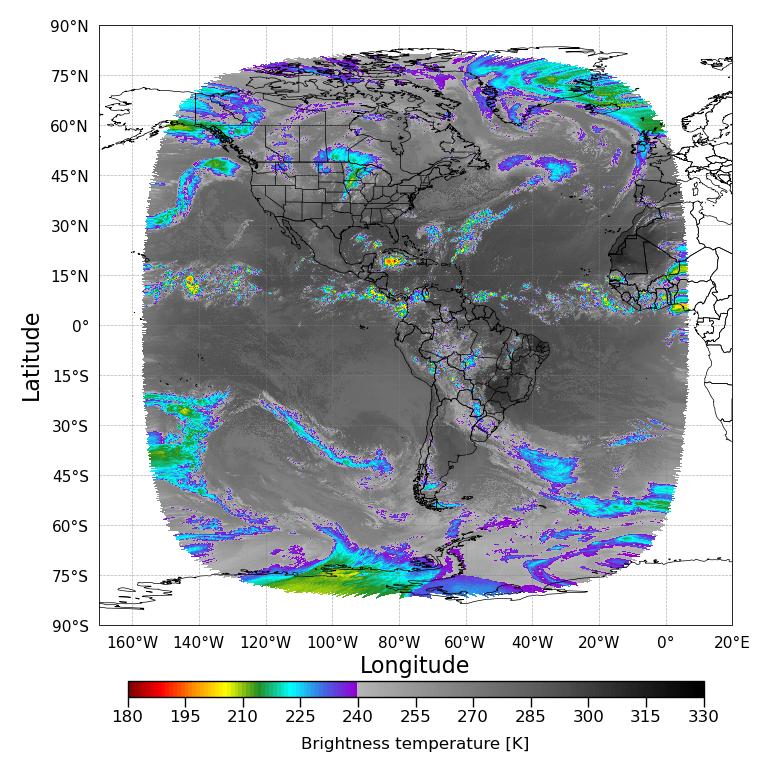

In [6]:
# PLOTTING IMAGE USING CARTOPY

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Defines the plot area
LLLon, URLon = -170.0, 20.0
LLLat, URLat = -90.0, 90.0

# Defines map projection
MapProj = ccrs.PlateCarree()

# Defines field projection
FieldProj = ccrs.PlateCarree()

# Creates figure
fig = plt.figure('example_01_cartopy', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75], projection=MapProj)
ax.set_extent(extents=[LLLon, URLon, LLLat, URLat], crs=MapProj)

# Add geographic boundaries
countries = cf.NaturalEarthFeature(category='cultural', name='admin_0_countries',
                                   scale='50m', facecolor='none')
ax.add_feature(countries, edgecolor='black', linewidth=0.25)
states = cf.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines',
                                scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linewidth=0.25)

# Plot image
img = ax.pcolormesh(loncor, latcor, var, cmap=mypalette, norm=norm, transform = FieldProj)

# Customizing the plot border
ax.outline_patch.set_linewidth(0.3)

# Plot colorbar
cbar = plt.colorbar(img, ticks=tickslabels, extend='neither', spacing='proportional',
                    orientation = 'horizontal', cax=fig.add_axes([0.14, 0.07, 0.72, 0.02]))
cbar.ax.tick_params(labelsize=6, labelcolor='black', width=0.5, direction='out', pad=1.0)
cbar.set_label(label='Brightness temperature [K]', size=6, color='black', weight='normal')
cbar.outline.set_linewidth(0.5)


# Sets X axis characteristics
xticks = np.arange(-180.0,25.0,20.0)
ax.set_xticks(xticks, crs=MapProj)
ax.set_xticklabels(xticks, fontsize=5.5, color='black')
lon_formatter = LongitudeFormatter(number_format='.0f', degree_symbol='°',
                                   dateline_direction_label=True)
ax.xaxis.set_major_formatter(lon_formatter)

# Sets Y axis characteristics
yticks = np.arange(90.0,-95.0,-15.0)
ax.set_yticks(yticks, crs=MapProj)
ax.set_yticklabels(yticks, fontsize=5.5, color='black')
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='°')
ax.yaxis.set_major_formatter(lat_formatter)

# Sets grid characteristics
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, length=0.0, width=0.05)
ax.gridlines(xlocs=xticks, ylocs=yticks, color='gray', alpha=0.6, draw_labels=False,
             linewidth=0.25, linestyle='--')

ax.set_xlim(LLLon, URLon)
ax.set_ylim(LLLat, URLat)

fig.text(0.5, 0.11, 'Longitude', color='black', fontsize=8, verticalalignment='center',
         horizontalalignment='center')
fig.text(0.02, 0.5, 'Latitude', color='black', fontsize=8, verticalalignment='center',
         horizontalalignment='center', rotation=90.0)

#plt.savefig(path+'example_01_cartopy.png')
plt.show()